In [1]:
#develop a classification model -Logistic regression model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [9]:

# Load the dataset
df_delay = pd.read_csv('./df_delays.csv')

In [10]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10151 entries, 0 to 10150
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10151 non-null  object 
 1   Time       10151 non-null  object 
 2   Day        10151 non-null  object 
 3   Station    10151 non-null  object 
 4   Code       10151 non-null  object 
 5   Min Delay  10151 non-null  float64
 6   Min Gap    10151 non-null  float64
 7   Bound      10006 non-null  object 
 8   Line       10151 non-null  object 
 9   Vehicle    10147 non-null  float64
dtypes: float64(3), object(7)
memory usage: 793.2+ KB


In [11]:
#perform data transformation

X = df_delay.drop('Min Delay', axis=1)
y = df_delay['Min Delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Min Gap']
#categorical_features = ['Station', 'Code', 'Bound','Line','Vehicle','Category']
categorical_features = ['Bound','Line', 'Day']#, 'Category', 'Month']


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [12]:
#data processing for developing the logistic regression model.

from sklearn.linear_model import LogisticRegression
import joblib

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


joblib.dump(model, 'ttc_delay_logistic_regression_model.joblib')
joblib.dump(preprocessor, 'ttc_delay_preprocessor.joblib')

accuracy = model.score(X_test, y_test)
print(accuracy)
 

0.3362875430822255


c:\Users\jcp_2\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


This means that the model correctly classified approximately as 74.45% of the instances in the test set.

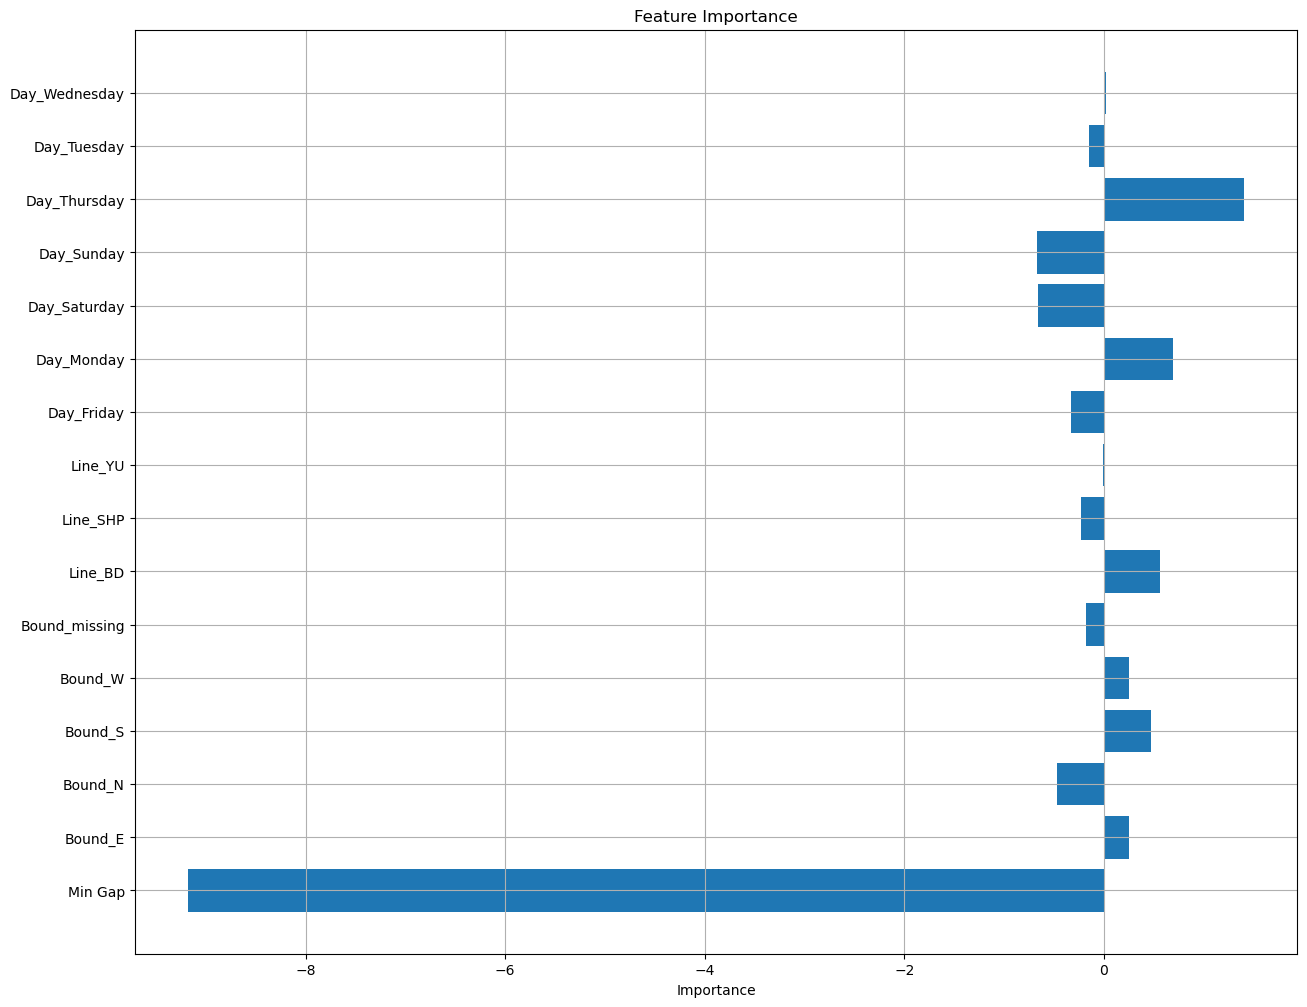

In [13]:
# visualize the importance of the model features 
import matplotlib.pyplot as plt
import numpy as np

importance = model.coef_[0]
features = np.array(numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)))

plt.figure(figsize=(15, 12))
plt.barh(features, importance)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.grid(True)
plt.show()